# **Data Exploration Notebook**

This notebook performs initial data exploration and preprocessing:

- Download raw data.
- Load and examine the dataset structure.
- Rename columns for clarity.
- Transform datetime column into proper index format.
- Validate target variable suitability for machine learning tasks.
- Aggregate data to prepare features for modeling.
- Save preprocessed dataset for further analysis.

---

## **Import required libraries**

In [1]:
# notebooks/1.data-exploration.ipynb
import pandas as pd
import matplotlib.pyplot as plt
from huggingface_hub import hf_hub_download

## **Download the raw BTC/USDT cryptocurrency data**

In [2]:
hf_hub_download(
    repo_id="Sierra-Arn/finml-lab-data",
    filename="raw/BTCUSDT.parquet",
    repo_type="dataset",
    local_dir="../data"
)

# Note: If preferred, this dataset can also be downloaded manually from Kaggle at:
# https://www.kaggle.com/datasets/arthurneuron/cryptocurrency-futures-ohlcv-dataset-1m-2024

'../data/raw/BTCUSDT.parquet'

## **Note: difference between parquet and csv**

### **CSV (Comma-Separated Values)**
— text storage format where data is stored as rows with delimiters.

**Advantages**
- **Human-readable** — can be opened in any text editor.
- **Universal** — supported by all programs and tools.

**Disadvantages**
- **Large file size** — text takes more storage space.
- **Slow loading** — requires parsing each row.
- **No data types** — everything stored as strings.

### **Parquet**
— binary columnar storage format designed for efficient data storage and analytics.

**Advantages**
- **Small file size** — compression up to 10x better than CSV.
- **Fast loading** — optimized for analytical queries.
- **Data types preserved** — maintains exact types (int, float, datetime, etc.).
- **Complex structures** — supports indexes, multi-indexes, etc.

**Disadvantages**
- **Not human-readable** — binary format.
- **Requires special libraries** — cannot be opened in text editors. For instance, this project uses PyArrow to handle Parquet files — without it, Python cannot read and write these files.

## **Read the raw data**

In [3]:
# data_df = pd.read_csv("../data/raw/BTCUSDT.csv")
data_df = pd.read_parquet("../data/raw/BTCUSDT.parquet")
data_df

,d,o,h,l,c,v
0,1567965420000,10000.0,10000.0,10000.0,10000.0,0.001
1,1567965480000,10000.0,10000.0,10000.0,10000.0,0.000
2,1567965540000,10000.0,10000.0,10000.0,10000.0,0.001
3,1567965600000,10000.0,10000.0,10000.0,10000.0,0.000
4,1567965660000,10000.0,10000.0,10000.0,10000.0,0.000
...,...,...,...,...,...,...
2313765,1706791380000,42181.8,42188.7,42177.2,42181.2,69.862
2313766,1706791440000,42181.1,42181.1,42177.4,42178.3,35.439
2313767,1706791500000,42178.3,42207.0,42168.4,42202.5,145.601
2313768,1706791560000,42202.4,42229.9,42196.3,42209.1,180.169


## **Rename columns for clarity and transform datetime column into proper index format**

In [4]:
data_df.rename(columns = {'o': 'open', 'h': 'high', 'l': 'low', 'c': 'close', 'v': 'volume', 'd': 'datetime'}, inplace=True)
data_df['datetime'] = pd.to_datetime(data_df['datetime'], unit='ms')
data_df = data_df.set_index('datetime')
data_df

,open,high,low,close,volume
datetime,,,,,
2019-09-08 17:57:00,10000.0,10000.0,10000.0,10000.0,0.001
2019-09-08 17:58:00,10000.0,10000.0,10000.0,10000.0,0.000
2019-09-08 17:59:00,10000.0,10000.0,10000.0,10000.0,0.001
2019-09-08 18:00:00,10000.0,10000.0,10000.0,10000.0,0.000
2019-09-08 18:01:00,10000.0,10000.0,10000.0,10000.0,0.000
...,...,...,...,...,...
2024-02-01 12:43:00,42181.8,42188.7,42177.2,42181.2,69.862
2024-02-01 12:44:00,42181.1,42181.1,42177.4,42178.3,35.439
2024-02-01 12:45:00,42178.3,42207.0,42168.4,42202.5,145.601


## **Validate target variable suitability for machine learning tasks**

Ensure the target variable contains sufficient volatility with multiple ups and downs, rather than monotonic trends. This variability is essential for training a model that can learn to predict both rising and falling price movements, instead of learning from data that only goes up, down, or remains static.

Looking at the plot below, we can see that this variable is well-suited for our machine learning task, as it demonstrates the necessary volatility with multiple ups and downs rather than monotonic trends.

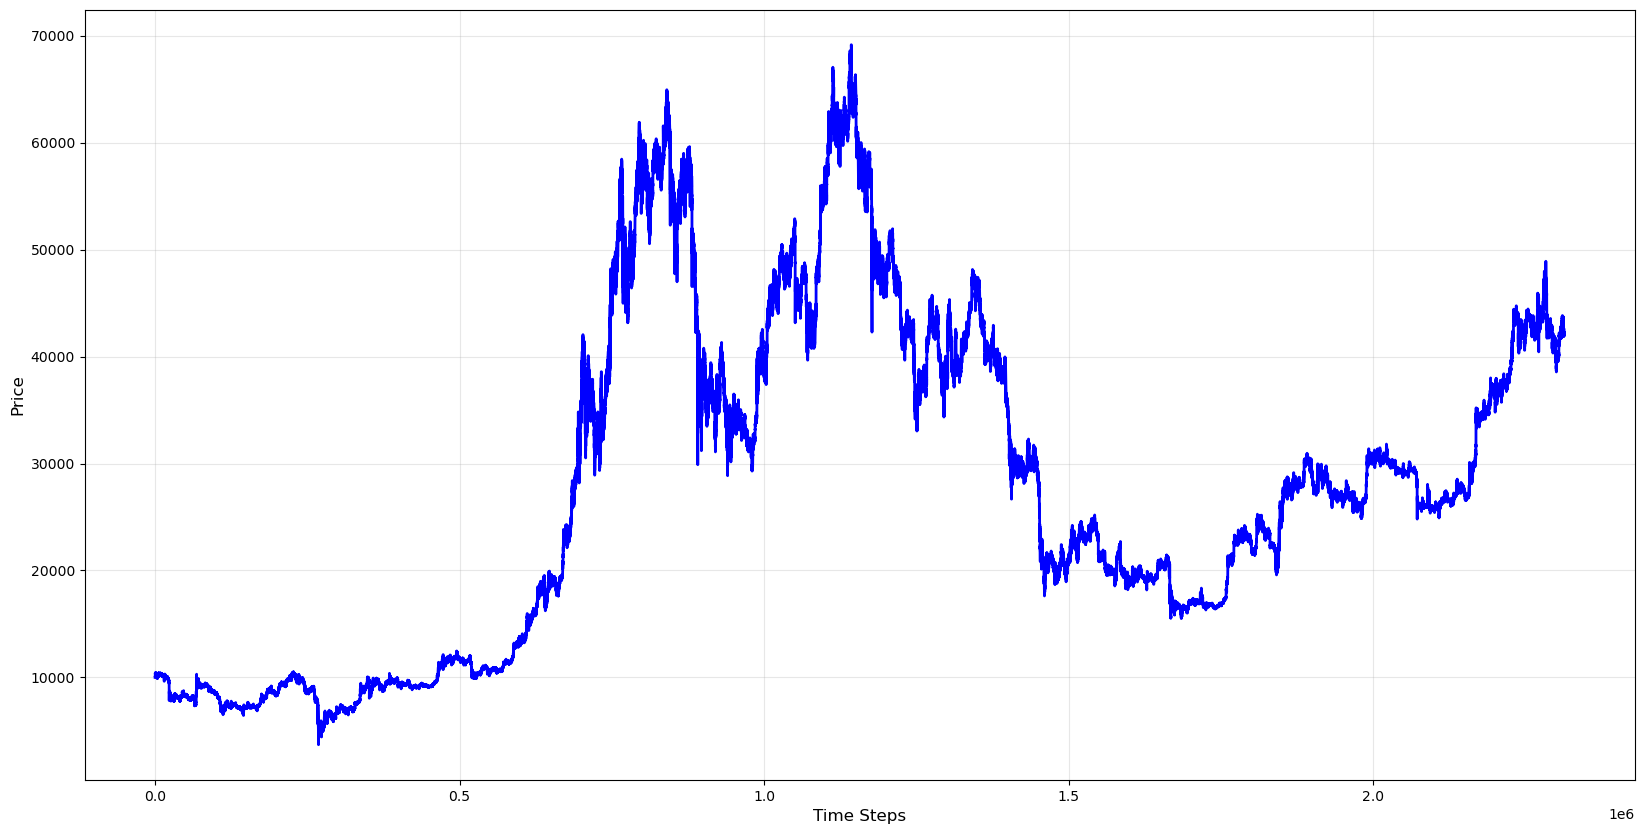

In [5]:
plt.figure(figsize=(20, 10))

x = data_df['close'].to_numpy()

plt.plot(x, linewidth=2, color='blue')

plt.xlabel('Time Steps', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

## **Aggregate data to prepare features for modeling**

In [6]:
aggregated_data_df = data_df.resample('1h').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum',
})

aggregated_data_df

,open,high,low,close,volume
datetime,,,,,
2019-09-08 17:00:00,10000.00,10000.00,10000.00,10000.00,0.002
2019-09-08 18:00:00,10000.00,10000.00,10000.00,10000.00,0.000
2019-09-08 19:00:00,10000.00,10357.53,10000.00,10340.12,471.659
2019-09-08 20:00:00,10340.12,10368.64,10334.54,10351.42,583.271
2019-09-08 21:00:00,10351.42,10391.90,10324.77,10391.90,689.759
...,...,...,...,...,...
2024-02-01 08:00:00,42182.30,42246.70,42112.10,42236.00,4634.536
2024-02-01 09:00:00,42236.00,42259.70,42110.70,42141.00,4467.999
2024-02-01 10:00:00,42141.00,42323.60,42100.00,42214.10,6801.445


## **Save preprocessed dataset for further analysis**

In [7]:
aggregated_data_df.to_parquet("../data/raw/raw_1h_data.parquet")